# 2. EDA

In [1]:
# Libraries imported for this notebook.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson
import seaborn as sns

In [2]:
# Read Wrangled_Data.xlsx into a dataframe, formatted dates, and indexed dates.

df = pd.read_excel('/Users/NJahns/Desktop/Bootcamp/Capstone_Two/Edited_Data/Wrangled_Data.xlsx', parse_dates=True, index_col=[0])

In [3]:
# Looked at shape

df.shape

(2281, 20)

In [4]:
# Described data

df.describe()

,Sludge Volume Index,SE NH3,MLSS,RAS TSS,Alum Feed 1,Alum Feed 2,WAS Flow,Primary Sludge A Flow,Primary Sludge B Flow,F:M Ratio,Ana F:M,RAS Flow,Avg ND Effluent Hourly Ammonia,Avg ND WAS Flow,Avg ND Aeration DO Cell 5 AVG,Avg ND Aeration DO Cell 7 AVG,Avg ND Aer. Avg Cell 7 Nitrate,Avg ND Average Basin Airflow,day,month
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,101.214906,0.230009,3118.910566,11843.809733,59.196186,58.898071,172429.398729,14292.622096,9397.458132,0.362787,1.579192,3980.658406,1.590581,173.670843,2.876290,1.758549,6.444091,1931.928850,2.999123,6.345463
std,25.326482,0.503577,382.151950,3251.272190,44.991646,52.312601,40388.507891,7117.776272,8510.071101,0.265164,1.154245,1347.552888,1.162595,87.994123,0.557153,0.729055,1.498188,313.090483,2.000438,3.497228
min,54.127726,0.050000,1630.000000,2430.000000,0.000000,0.000000,561.000000,0.000000,815.000000,0.056544,0.246133,0.000000,0.000000,25.263334,1.314688,0.421875,0.902778,1032.716667,0.000000,1.000000
25%,84.548105,0.050000,2870.000000,9860.000000,32.000000,13.500000,155540.000000,9009.000000,6747.000000,0.215173,0.936634,3260.131250,0.724389,114.929167,2.507583,1.292396,5.419931,1701.475000,1.000000,3.000000
50%,97.591699,0.050000,3110.000000,11423.333333,60.000000,52.000000,176907.000000,12450.000000,9024.000000,0.287060,1.249557,3705.937500,1.307706,130.085713,2.806981,1.630104,6.368750,1941.572917,3.000000,6.000000
75%,110.893672,0.092000,3350.000000,13060.000000,82.000000,87.000000,196068.000000,19871.000000,10881.000000,0.420046,1.828437,4442.731250,2.209343,250.145456,3.158542,2.015867,7.365243,2126.891667,5.000000,9.000000
max,235.179786,4.400000,5740.000000,29890.000000,352.000000,362.000000,284956.000000,41418.000000,138804.000000,2.879602,12.534739,15000.000000,8.016932,538.810004,4.465167,6.136622,11.554219,3221.891302,6.000000,12.000000


## Data Distribution

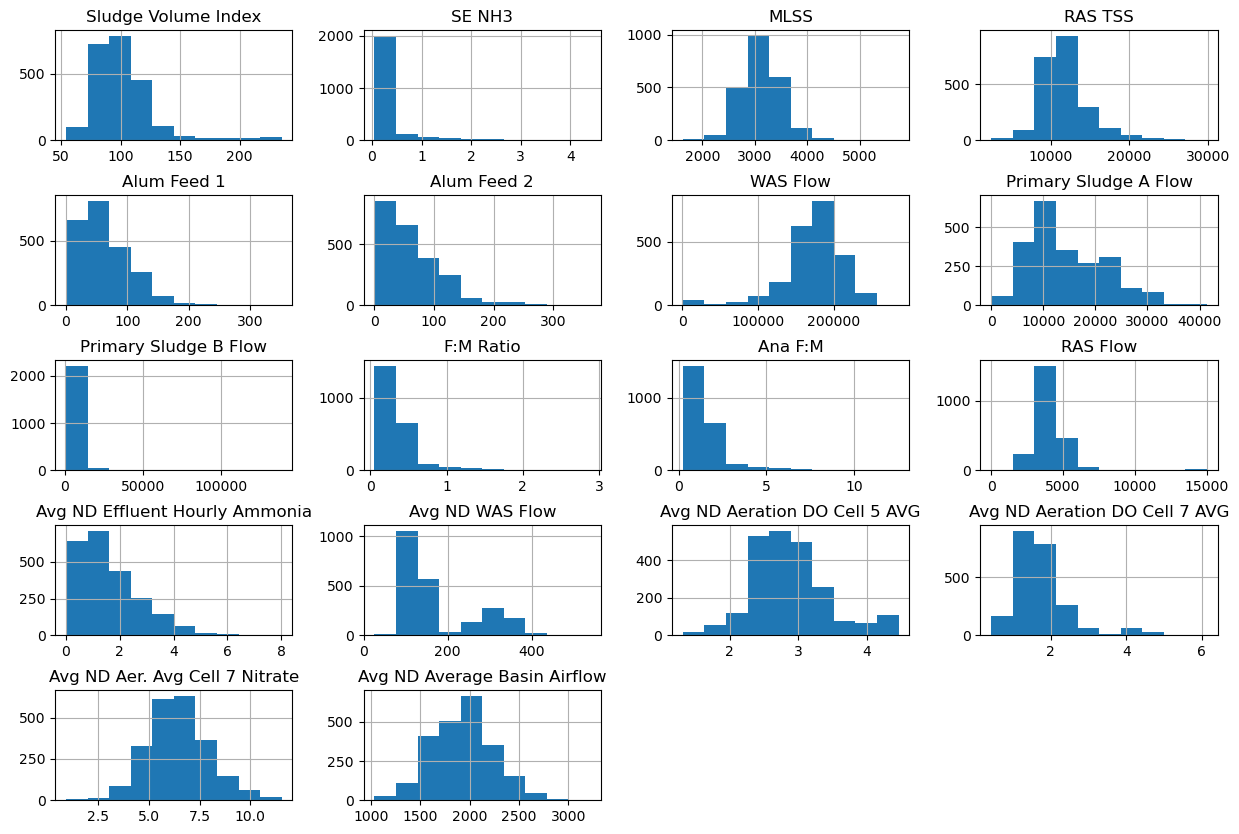

In [5]:
# Investigated distribution of metric data.

columns_to_include = [col for col in df.columns if col not in ['day', 'month']]
df[columns_to_include].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

In [6]:
# Performed Shapiro-Wilk test to see is metrics have a normal distribution.

columns_to_exclude = ['day', 'month']
for column in df.columns:
    if column not in columns_to_exclude:
        stat, p_value = shapiro(df[column])
        print(f"Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}")

Shapiro-Wilk test for Sludge Volume Index: Statistic=0.832215428352356, p-value=7.847271400218976e-44
Shapiro-Wilk test for SE NH3: Statistic=0.41282618045806885, p-value=0.0
Shapiro-Wilk test for MLSS: Statistic=0.9843858480453491, p-value=4.068022265888652e-15
Shapiro-Wilk test for RAS TSS: Statistic=0.9109399318695068, p-value=1.2827809396201203e-34
Shapiro-Wilk test for Alum Feed 1: Statistic=0.9370107054710388, p-value=4.639786417045902e-30
Shapiro-Wilk test for Alum Feed 2: Statistic=0.8987582325935364, p-value=2.1634442961654445e-36
Shapiro-Wilk test for WAS Flow: Statistic=0.8978842496871948, p-value=1.6391378707115362e-36
Shapiro-Wilk test for Primary Sludge A Flow: Statistic=0.9531006813049316, p-value=1.91513287297021e-26
Shapiro-Wilk test for Primary Sludge B Flow: Statistic=0.32561981678009033, p-value=0.0
Shapiro-Wilk test for F:M Ratio: Statistic=0.6502834558486938, p-value=0.0
Shapiro-Wilk test for Ana F:M: Statistic=0.6502834558486938, p-value=0.0
Shapiro-Wilk test for

The metrics are not normally distributed.

## Visualization

In [7]:
# Added a year column for future calculations.

df['year'] = df.index.year

### Line plots

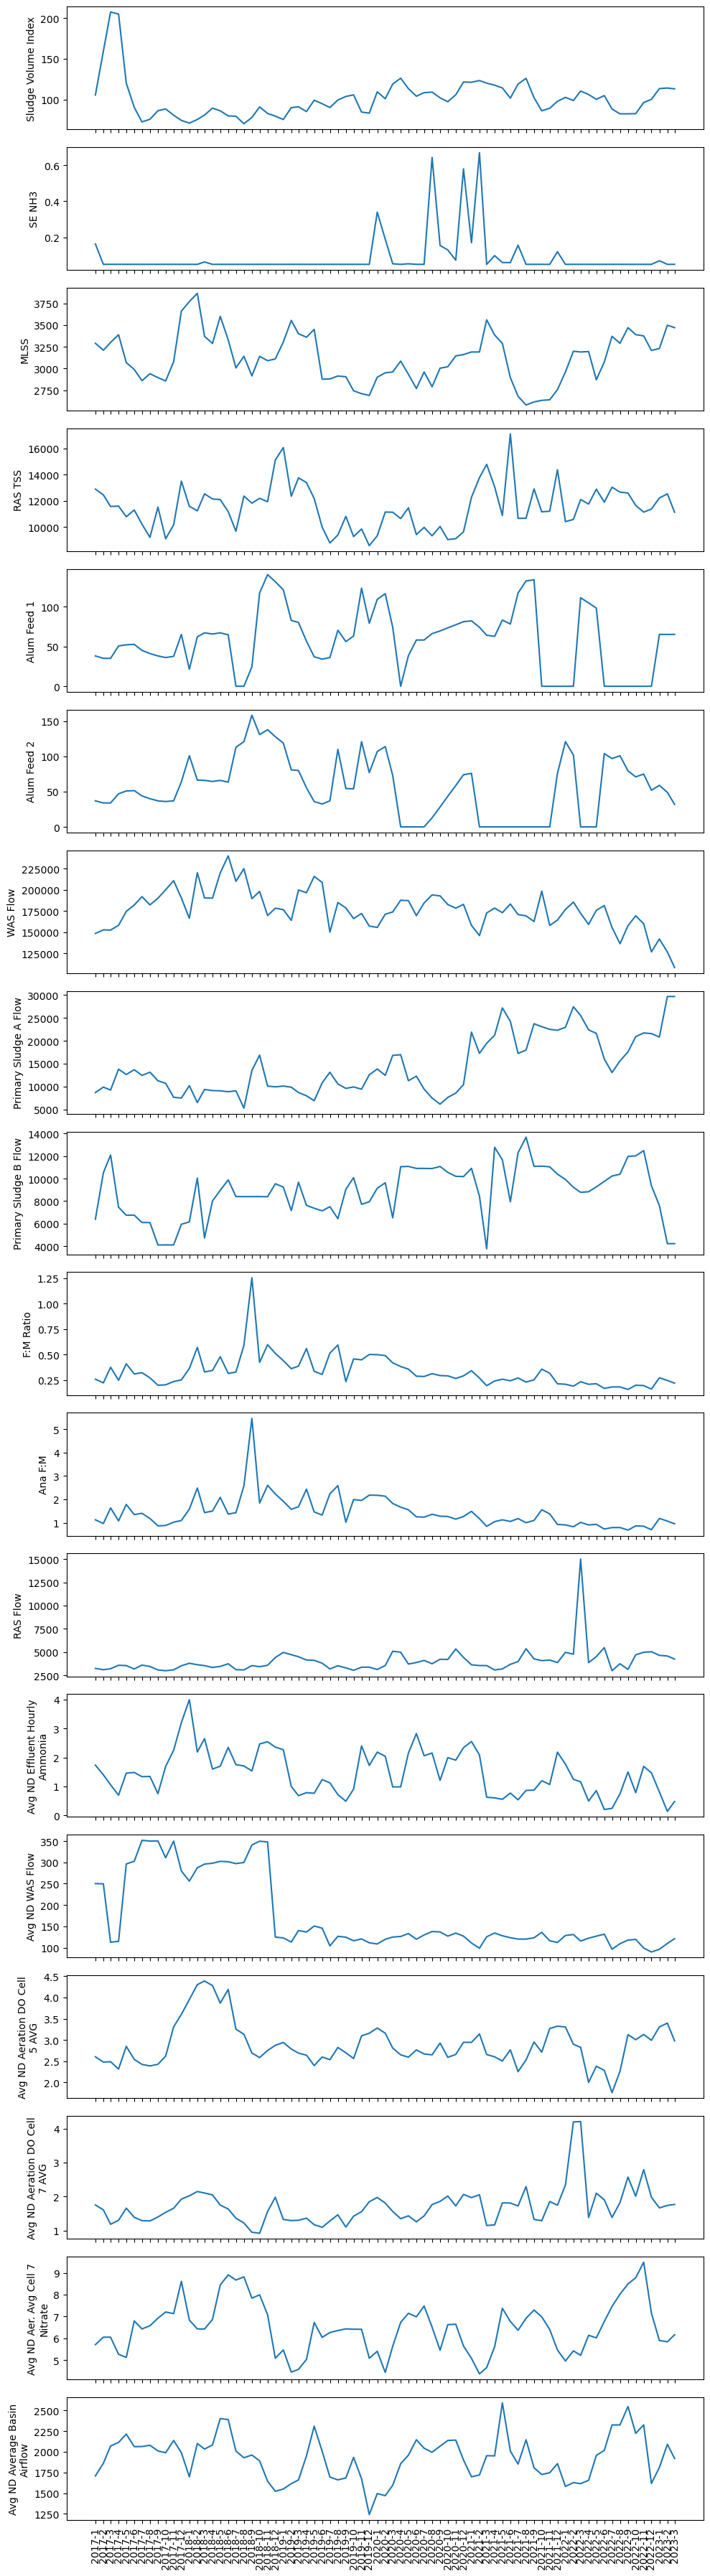

In [8]:
# Plotted monthly medians of metrics to look for patterns. Median is used because the some of the data is nonparametric.

monthly_medians = df.groupby(['year', 'month']).median().reset_index()
monthly_medians['date'] = pd.to_datetime(monthly_medians[['year', 'month']].assign(day=1))

exclude_columns = ['day', 'month', 'year']
columns_to_plot = [column for column in df.columns if column not in exclude_columns]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 2 * len(columns_to_plot)), sharex=True)

for i, column in enumerate(columns_to_plot):
    axes[i].plot(monthly_medians['date'], monthly_medians[column])
    
    if len(column) > 24:
        split_index = column.rfind(' ', 0, 24)
        if split_index != -1:
            label_part1 = column[:split_index]
            label_part2 = column[split_index+1:]
        else:
            label_part1 = column[:12]
            label_part2 = column[12:]
            
        column_label = f"{label_part1}\n{label_part2}"
    else:
        column_label = column
    
    axes[i].set_ylabel(column_label)

date_labels = [f"{row['year']}-{row['month']}" for _, row in monthly_medians.iterrows()]
plt.xticks(monthly_medians['date'], date_labels, rotation=90)

plt.tight_layout()

plt.show()

ANA F:M and F:M Ratio graphs are exactly the same. They are likely correlated. A decreasing trend in ‘WAS flow’ and increase in ‘Primary Sludge A Flow’ from mid 2018 to 2023 was identified. In addition, many metrics had relatively large values in 2017 and 2018. A few metrics display seasonality.

### Boxplots

/var/folders/77/lhc9l51s19q1rxd2jv1wfxf40000gn/T/ipykernel_1191/376085835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], width=0.5, palette='Set3')
/var/folders/77/lhc9l51s19q1rxd2jv1wfxf40000gn/T/ipykernel_1191/376085835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], width=0.5, palette='Set3')
/var/folders/77/lhc9l51s19q1rxd2jv1wfxf40000gn/T/ipykernel_1191/376085835.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], width=0.5, palette='Set3')
/var/folders/77/lhc

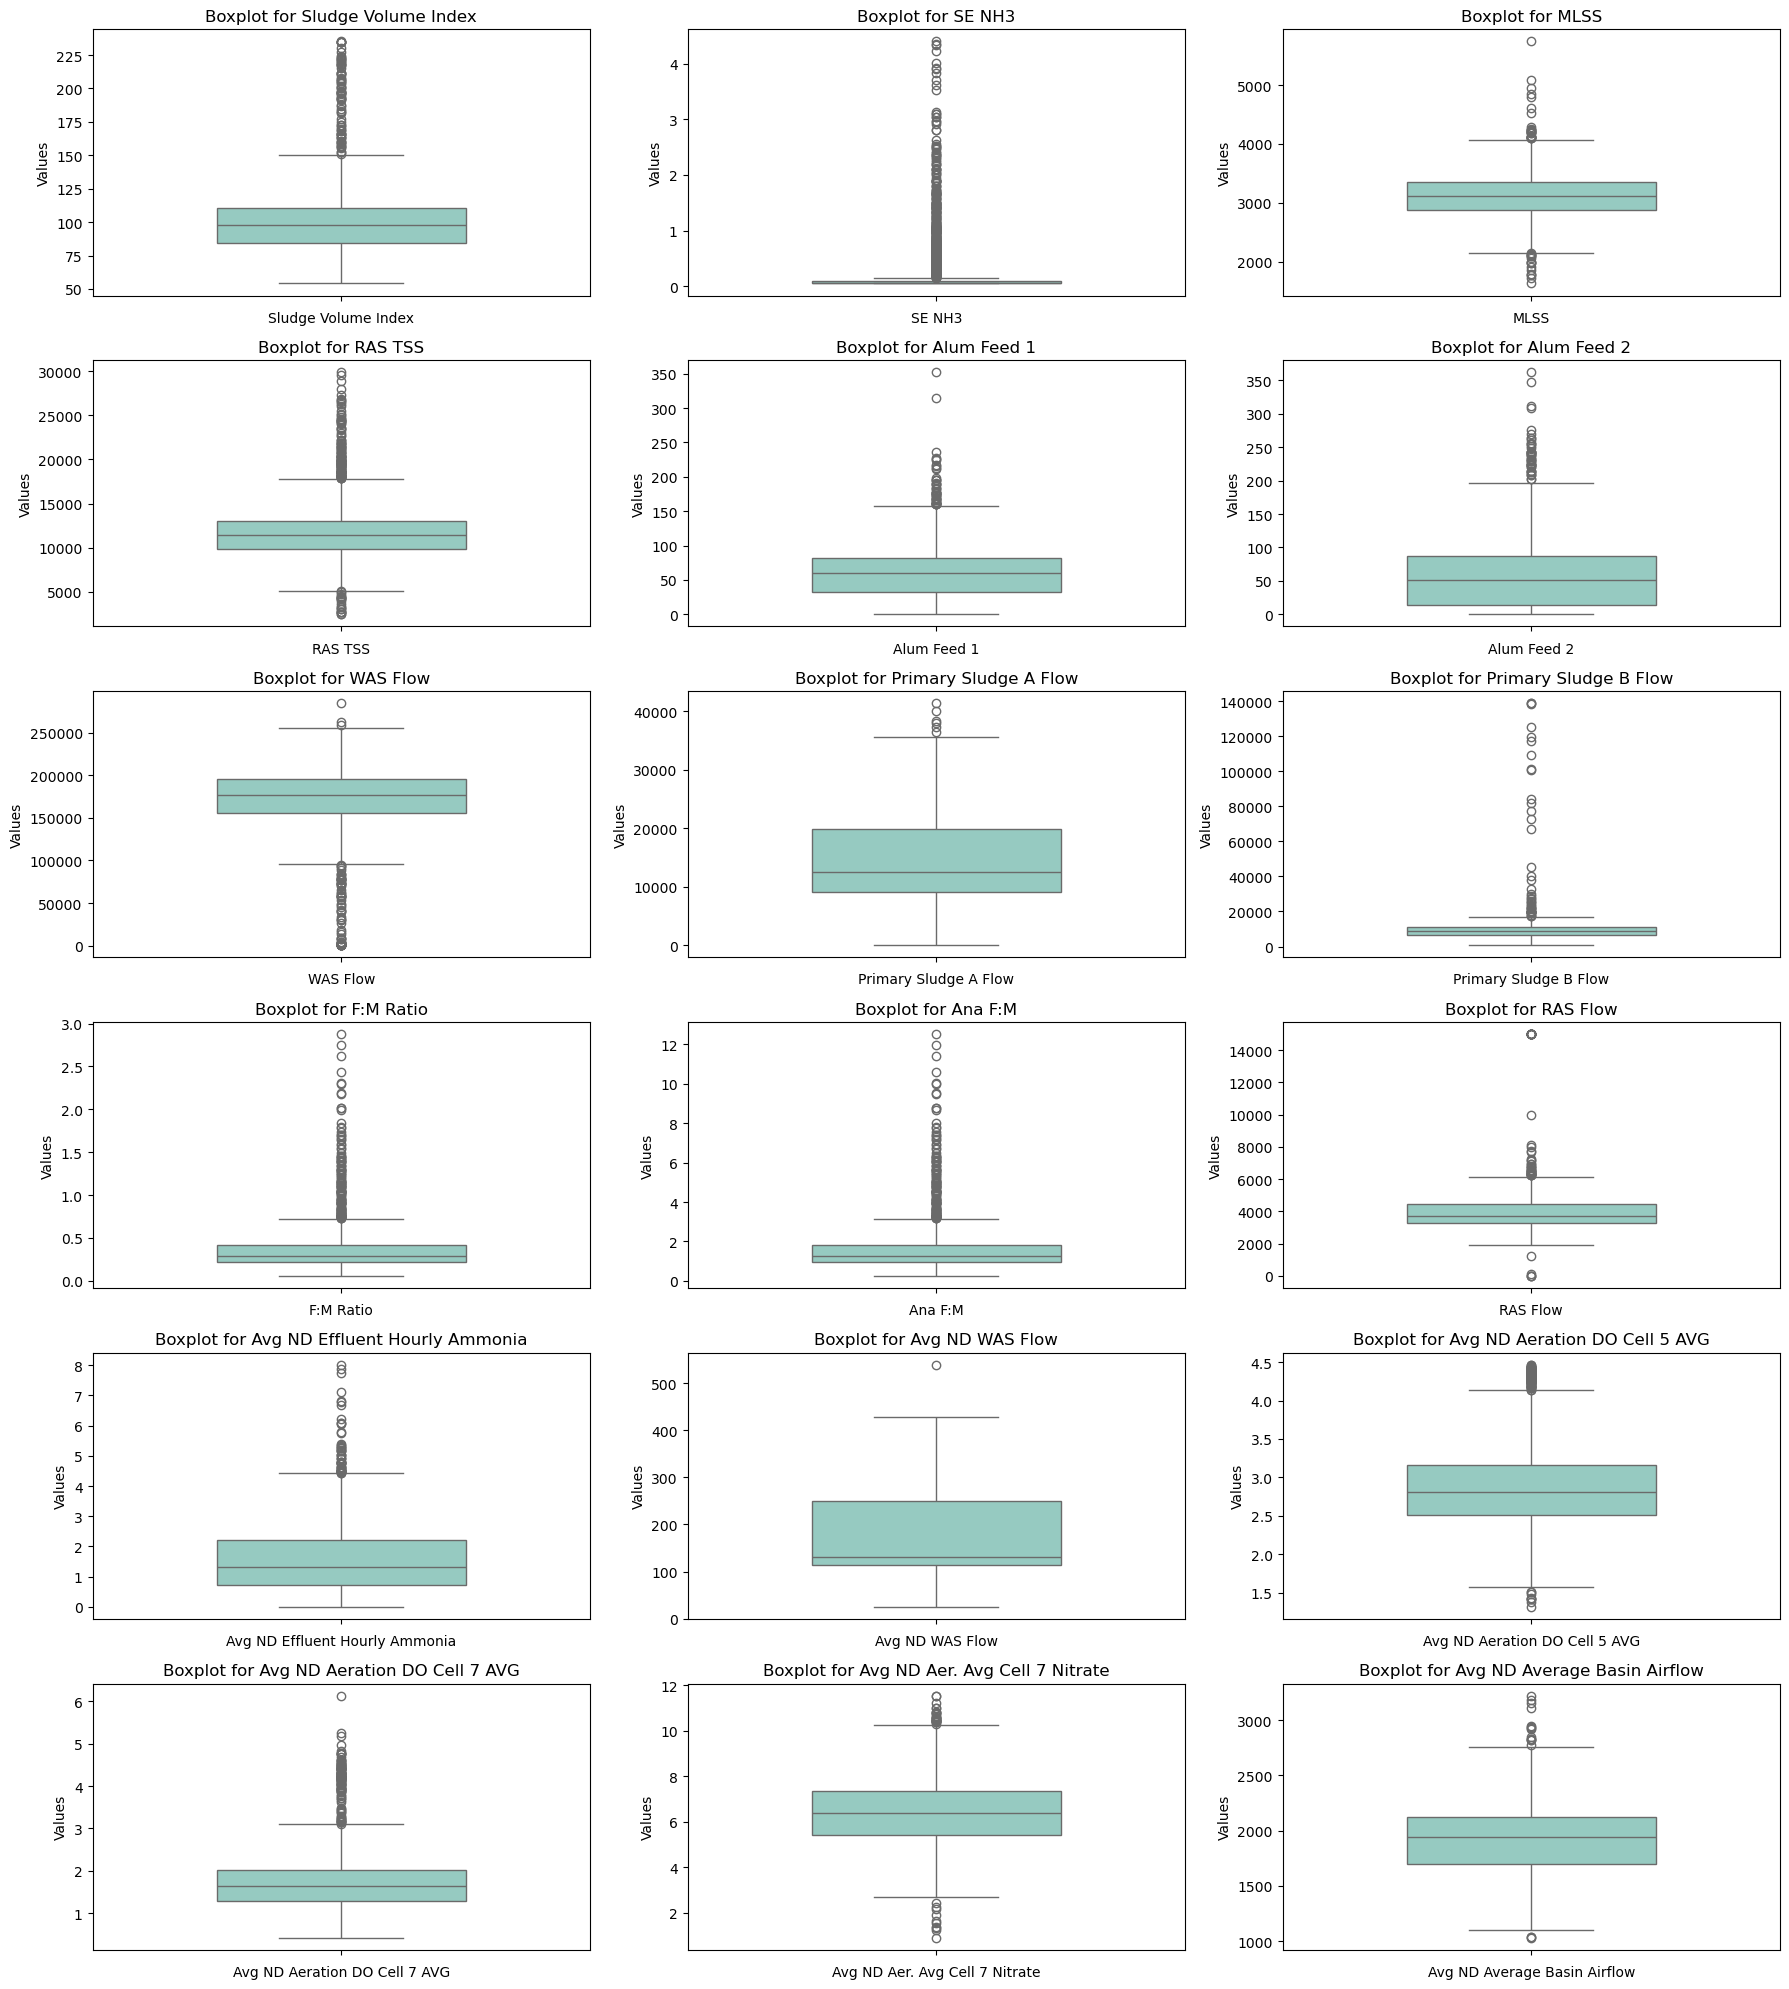

In [9]:
selected_cols = [feat for feat in df.columns if feat not in ['day', 'month', 'year']]

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(y=df[col], ax=axes[i], width=0.5, palette='Set3')
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

for j in range(len(selected_cols), 6*3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Some of the values appear to be outliers but I have not yet removed them as I would want to discuss the metrics with an expert in wastewater treatment to determine if the values are unrealistic.

## Correlations

### Heatmap

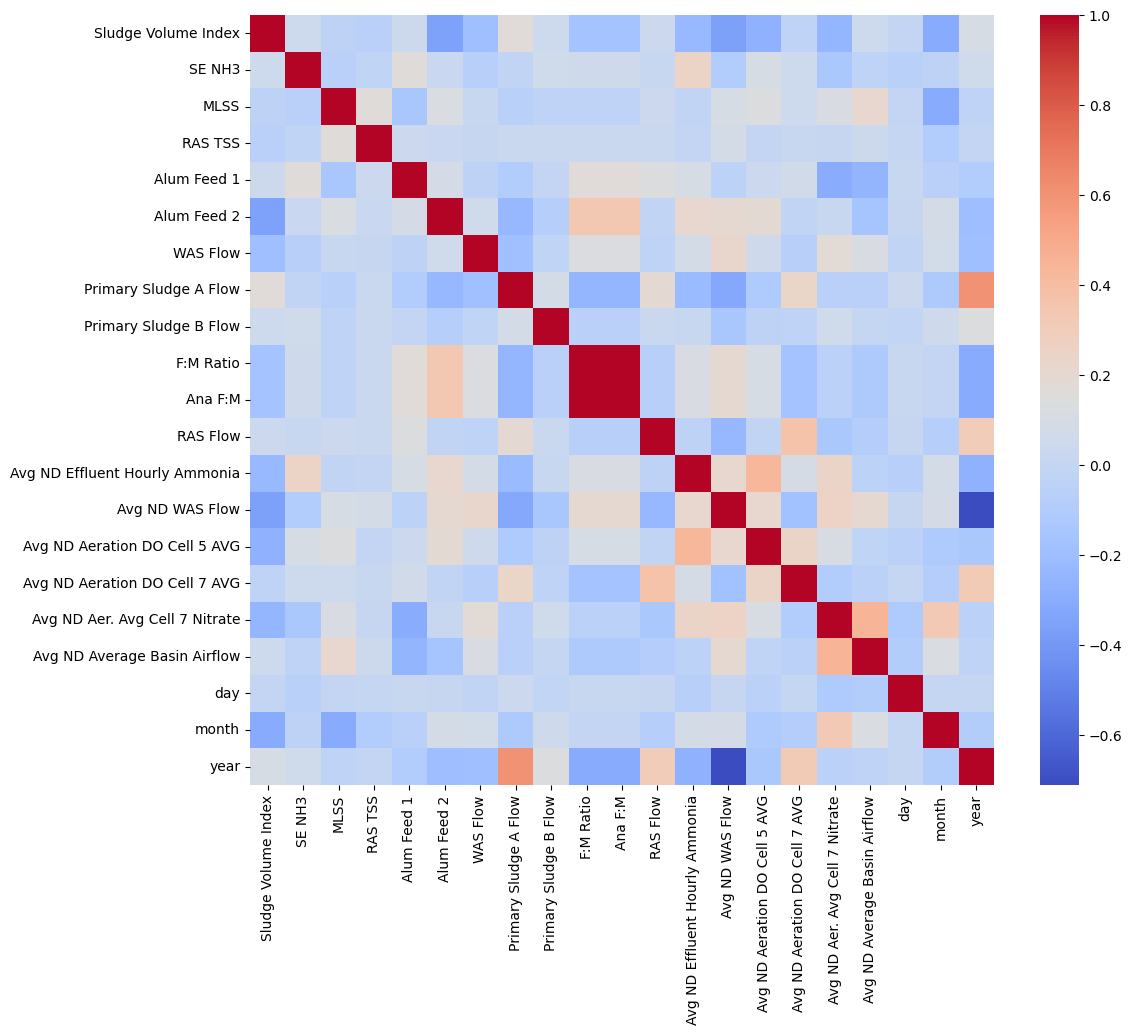

In [10]:
# Created correlatioin heatmap of SVI and features.

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), fmt=".2f", cmap="coolwarm", annot_kws={"fontsize": 7})
plt.show()

The heatmap showed little correlation between SVI and features. Between features, ANA F:M and F:M Ratio are perfectly correlated. As F:M Ratio measures both aerobin and anaerobic teatment, this perfect correlation would indicate the data is the same becasue no aerobic treatment is occuring. We can therefore omit one of these features from the model as it adds no more information. In additon, ‘Primary sludge flow A’ is positively correlated with year and ‘Avg ND WAS Flow’ is negatively correlated with ‘year’. The relationships, however, are not strong enough to justify omitting the data from the model. 

In [ ]:
# Dropped F:M Ratio coulumn from the dataframe because it is the same as F:M Ratio.

df.drop('F:M Ratio', axis=1, inplace=True)

### Scatterplots

In [ ]:
# Created pairplot of SVI against features to look for correlations.

selected_cols = [feat for feat in df.columns if feat not in ['day', 'month', 'year']]

pair_plot = sns.pairplot(df[selected_cols], kind='scatter', diag_kind='kde', height=2, aspect=1.5)
pair_plot.fig.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

Some of the data for alum feeds 1 and 2 appear to be related but not all of it.

# Data save

In [ ]:
# Saved to Excel
df.to_excel('/Users/NJahns/Desktop/Bootcamp/Capstone_Two/Edited_Data/EDA_Data.xlsx', index=True)